First 5 rows of the dataset:
   LearnableVariance  Bound  ReturnMeanIW  InitialBound  EpRewMean  \
0                NaN   -inf     23.409998          -inf      23.41   
1                NaN   -inf     21.619999          -inf      21.62   
2                NaN   -inf     21.850000          -inf      21.85   
3                NaN   -inf     20.599998          -inf      20.60   
4                NaN   -inf     21.590000          -inf      21.59   

   EpThisIter  Iteration  TimeElapsed  VarianceInit  EpLenMean  MeanEntropy  \
0         100          1     4.458750          -1.0      23.41     0.692994   
1         100          2     7.452818          -1.0      21.62     0.692995   
2         100          3    10.764794          -1.0      21.85     0.692983   
3         100          4    14.173692          -1.0      20.60     0.692991   
4         100          5    17.558052          -1.0      21.59     0.692959   

   EpisodesSoFar  TimestepsSoFar  
0            100            2341  
1    

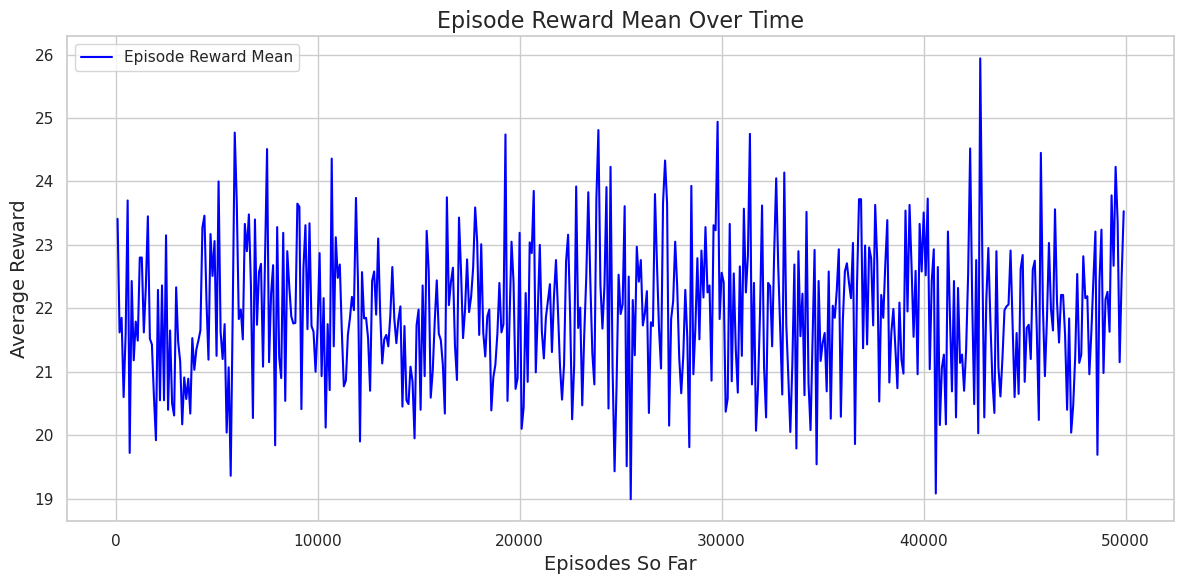

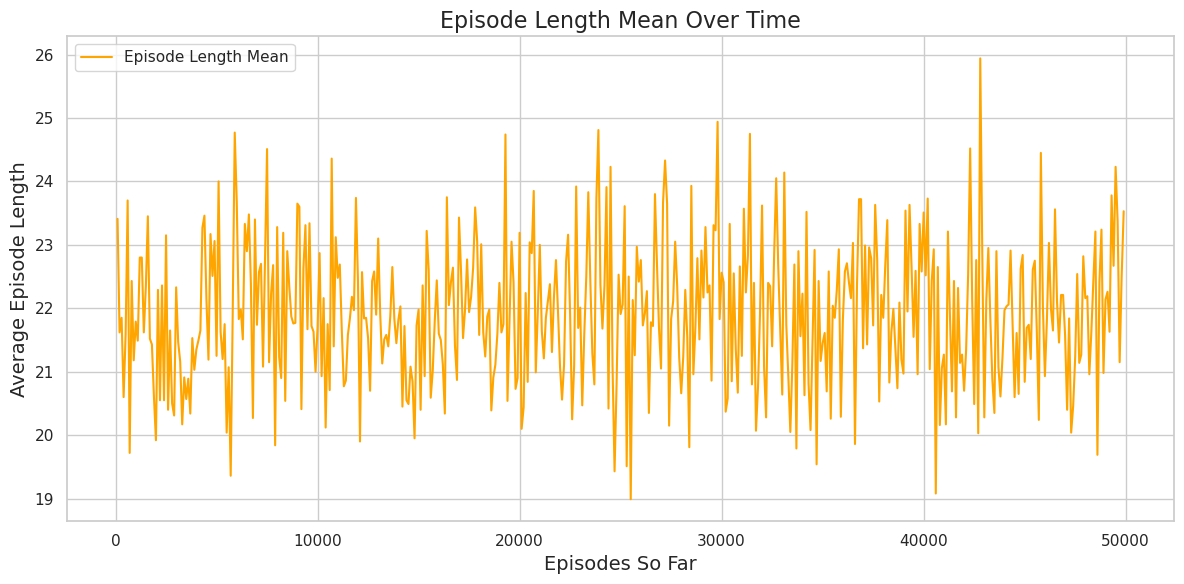

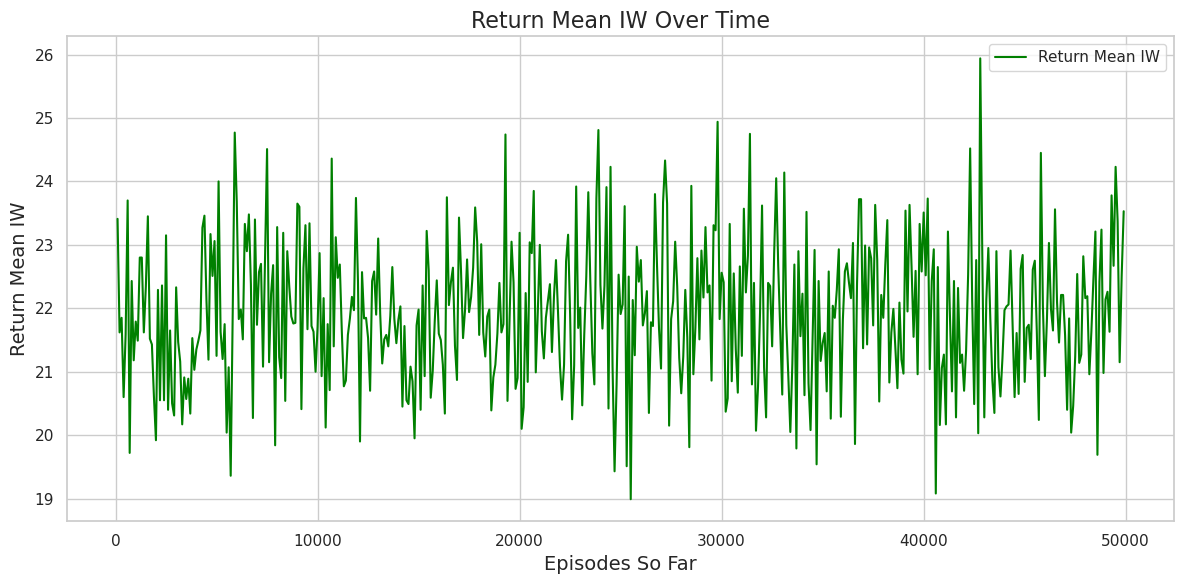

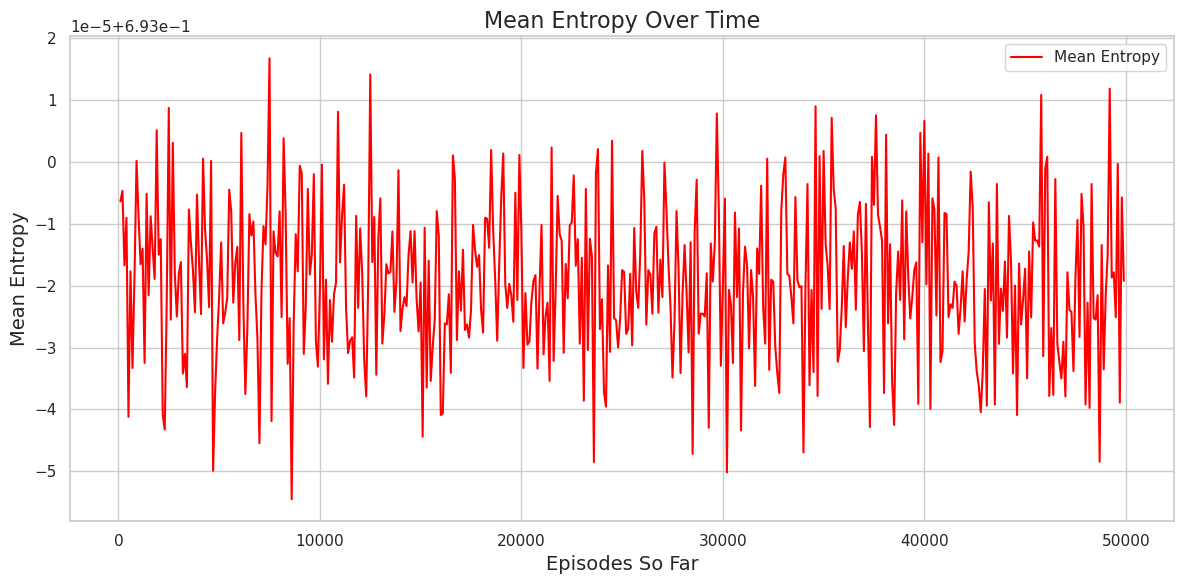

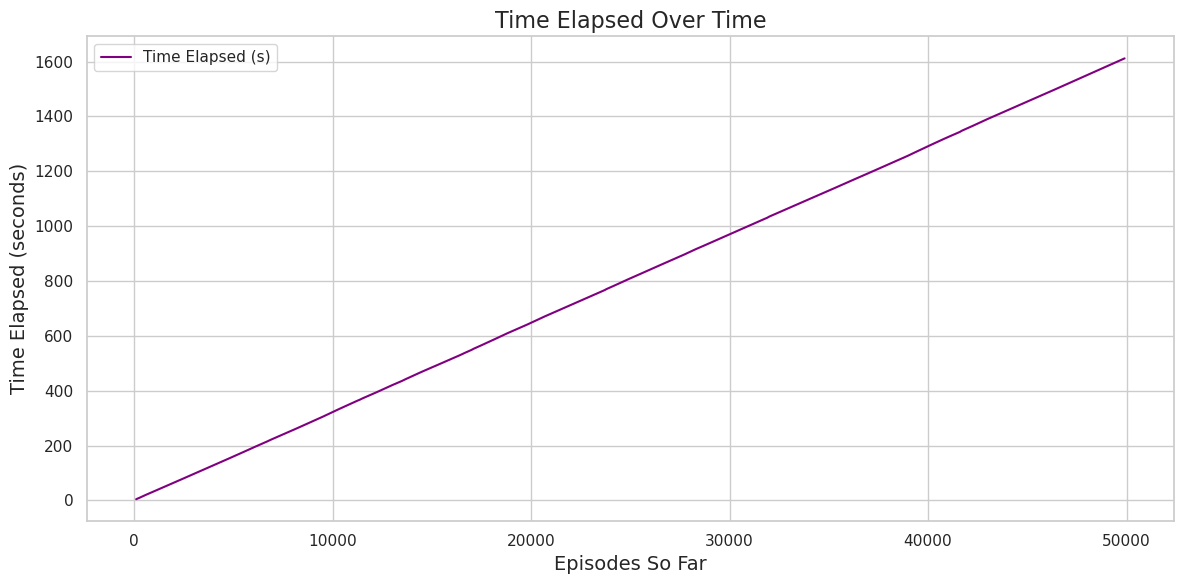

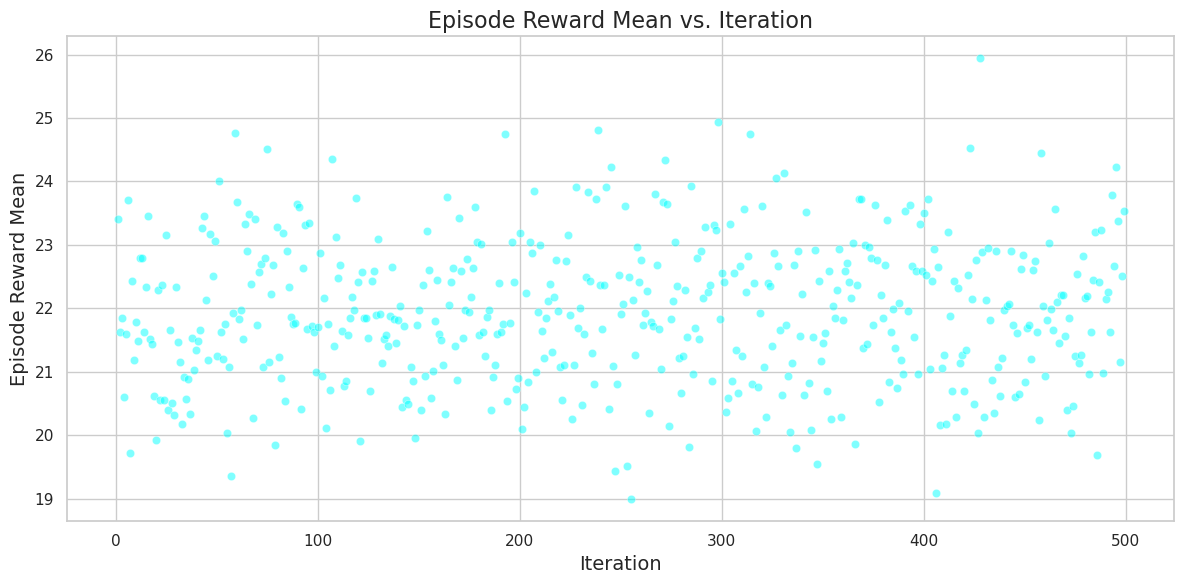

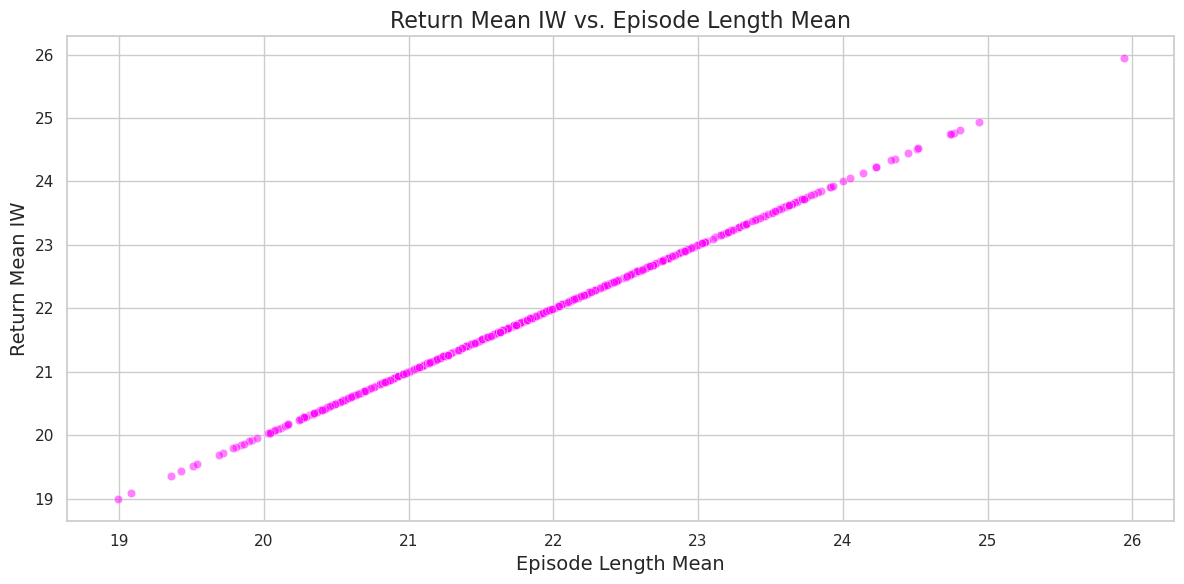

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Load the Data
# -----------------------------
# Replace 'data.csv' with the path to your CSV file if it's in a different directory
data = pd.read_csv('logs/RLLAB.CARTPOLE_delta=0.4_seed=0_1726812261.6706479.csv')

# Display the first few rows to verify
print("First 5 rows of the dataset:")
print(data.head())

print("\nDataset Information:")
print(data.info())

# -----------------------------
# 2. Data Cleaning and Preparation
# -----------------------------
# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

# Since 'InitialBound', 'LearnableVariance', 'Bound', and 'VarianceInit' have constant or missing values,
# we'll focus on the more dynamic metrics.

# Convert 'EpisodesSoFar' to integer if it's not already
data['EpisodesSoFar'] = data['EpisodesSoFar'].astype(int)

# -----------------------------
# 3. Setting Up Plotting Style
# -----------------------------
sns.set(style="whitegrid")  # Set Seaborn style for better aesthetics

# -----------------------------
# 4. Plotting Important Metrics
# -----------------------------

# a. Episode Reward Mean vs. Episodes
plt.figure(figsize=(12, 6))
sns.lineplot(x='EpisodesSoFar', y='EpRewMean', data=data, label='Episode Reward Mean', color='blue')
plt.xlabel('Episodes So Far', fontsize=14)
plt.ylabel('Average Reward', fontsize=14)
plt.title('Episode Reward Mean Over Time', fontsize=16)
plt.legend()
plt.tight_layout()
# plt.savefig('episode_reward_mean.png')  # Saves the plot as a PNG file
plt.show()

# b. Episode Length Mean vs. Episodes
plt.figure(figsize=(12, 6))
sns.lineplot(x='EpisodesSoFar', y='EpLenMean', data=data, label='Episode Length Mean', color='orange')
plt.xlabel('Episodes So Far', fontsize=14)
plt.ylabel('Average Episode Length', fontsize=14)
plt.title('Episode Length Mean Over Time', fontsize=16)
plt.legend()
plt.tight_layout()
# plt.savefig('episode_length_mean.png')
plt.show()

# c. Return Mean IW vs. Episodes
plt.figure(figsize=(12, 6))
sns.lineplot(x='EpisodesSoFar', y='ReturnMeanIW', data=data, label='Return Mean IW', color='green')
plt.xlabel('Episodes So Far', fontsize=14)
plt.ylabel('Return Mean IW', fontsize=14)
plt.title('Return Mean IW Over Time', fontsize=16)
plt.legend()
plt.tight_layout()
# plt.savefig('return_mean_iw.png')
plt.show()

# d. Mean Entropy vs. Episodes
plt.figure(figsize=(12, 6))
sns.lineplot(x='EpisodesSoFar', y='MeanEntropy', data=data, label='Mean Entropy', color='red')
plt.xlabel('Episodes So Far', fontsize=14)
plt.ylabel('Mean Entropy', fontsize=14)
plt.title('Mean Entropy Over Time', fontsize=16)
plt.legend()
plt.tight_layout()
# plt.savefig('mean_entropy.png')
plt.show()

# e. Time Elapsed vs. Episodes
plt.figure(figsize=(12, 6))
sns.lineplot(x='EpisodesSoFar', y='TimeElapsed', data=data, label='Time Elapsed (s)', color='purple')
plt.xlabel('Episodes So Far', fontsize=14)
plt.ylabel('Time Elapsed (seconds)', fontsize=14)
plt.title('Time Elapsed Over Time', fontsize=16)
plt.legend()
plt.tight_layout()
# plt.savefig('time_elapsed.png')
plt.show()

# -----------------------------
# 5. Additional Insights
# -----------------------------

# a. Episode Reward Mean vs. Iteration
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Iteration', y='EpRewMean', data=data, alpha=0.5, color='cyan')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Episode Reward Mean', fontsize=14)
plt.title('Episode Reward Mean vs. Iteration', fontsize=16)
plt.grid(True)
plt.tight_layout()
# plt.savefig('reward_vs_iteration.png')
plt.show()

# b. Return Mean IW vs. Episode Length Mean
plt.figure(figsize=(12, 6))
sns.scatterplot(x='EpLenMean', y='ReturnMeanIW', data=data, alpha=0.5, color='magenta')
plt.xlabel('Episode Length Mean', fontsize=14)
plt.ylabel('Return Mean IW', fontsize=14)
plt.title('Return Mean IW vs. Episode Length Mean', fontsize=16)
plt.grid(True)
plt.tight_layout()
# plt.savefig('return_vs_episode_length.png')
plt.show()
